In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
#pd.set_option('display.max_columns',1000)

# Data Understanding

In [5]:
data_path = ('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_data = pd.read_csv(data_path)

In [6]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180086,180122,180174,180259,180347,180419,180520,180584,180615,180615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276048,276081,276101,276101,276101,276221,276221,276310,276342,276401
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265870,265873,265873,265877,265884,265887,265889,265889,265889,265897
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,43067,43067,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99761,99761,99761,99761,99761,99761,99761


In [7]:
time_idx = raw_data.columns[4:]

In [8]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [9]:
raw_data['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [10]:
raw_data[raw_data['Country/Region']=='US'].iloc[:,4::].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
6/1/22     84451901
6/2/22     84570325
6/3/22     84724329
6/4/22     84748884
6/5/22     84762022
Length: 866, dtype: int64

In [11]:
country_list = ['Germany','India','US','China']

In [12]:
for each in country_list:
    df_plot[each] = np.array(raw_data[raw_data['Country/Region']==each].iloc[:,4::].sum(axis=0))

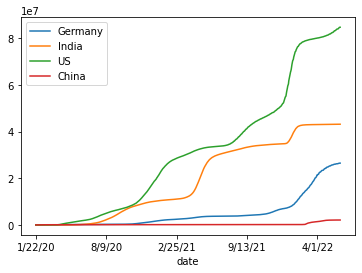

In [38]:
df_plot.set_index('date').plot()

# Data Type Date

In [39]:
df_plot.head()

,date,Germany,India,US,China
0,1/22/20,0,0,1,548
1,1/23/20,0,0,1,643
2,1/24/20,0,0,2,920
3,1/25/20,0,0,2,1406
4,1/26/20,0,0,5,2075


In [40]:
from datetime import datetime

In [41]:
df_plot.date[0]

'1/22/20'

In [42]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [43]:
# convert to datetime
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] 

# convert date to ISO norm (str)
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

In [46]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
df_plot.head()

,date,Germany,India,US,China
0,2020-01-22,0,0,1,548
1,2020-01-23,0,0,1,643
2,2020-01-24,0,0,2,920
3,2020-01-25,0,0,2,1406
4,2020-01-26,0,0,5,2075


In [84]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relation data model - defining a primary key

We have to use a primary key and each row should have a primary key
It cannot contain null values

In [57]:
data_path = ('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_data = pd.read_csv(data_path)
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180086,180122,180174,180259,180347,180419,180520,180584,180615,180615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276048,276081,276101,276101,276101,276221,276221,276310,276342,276401
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265870,265873,265873,265877,265884,265887,265889,265889,265889,265897
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,43067,43067,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99761,99761,99761,99761,99761,99761,99761


In [59]:
raw_data_base = raw_data.rename(columns = {'Country/Region':'Country',
                                          'Province/State':'State'})

In [60]:
raw_data_base = raw_data_base.drop(['Lat','Long'],axis=1)
raw_data_base.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180086,180122,180174,180259,180347,180419,180520,180584,180615,180615
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276048,276081,276101,276101,276101,276221,276221,276310,276342,276401
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265870,265873,265873,265877,265884,265887,265889,265889,265889,265897
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,43067,43067,43067
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99527,99527,99527,99761,99761,99761,99761,99761,99761,99761


In [65]:
transpose_data = raw_data_base.set_index(['State','Country']).T

In [66]:
transpose_data.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [80]:
pd_relational_model = transpose_data.stack(level=[0,1]).reset_index().rename(columns = {'level_0':'date',
                                                                 0:'Confirmed Cases'})
pd_relational_model

,date,State,Country,Confirmed Cases
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
417407,6/5/22,Zhejiang,West Bank and Gaza,657705.0
417408,6/5/22,Zhejiang,Winter Olympics 2022,535.0
417409,6/5/22,Zhejiang,Yemen,11822.0
417410,6/5/22,Zhejiang,Zambia,322207.0


In [81]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [82]:
pd_relational_model.dtypes

date               datetime64[ns]
State                      object
Country                    object
Confirmed Cases           float64
dtype: object

In [83]:
df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep = ';')